https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/


https://keras.io/api/datasets/cifar10/

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://pythonistaplanet.com/cifar-10-image-classification-using-keras/

https://www.machinecurve.com/index.php/2020/02/09/how-to-build-a-convnet-for-cifar-10-and-cifar-100-classification-with-keras/

https://www.kaggle.com/ektasharma/simple-cifar10-cnn-keras-code-with-88-accuracy

In [92]:
#import the required libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.optimizers import SGD
import keras 
from scipy import misc
import imageio
%pylab inline
from PIL import Image
from keras.preprocessing import image
import os
import PIL
import glob
import cv2
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
from keras import backend as K
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


## load cifar 10 data set

170500096/170498071 [==============================] - 27s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


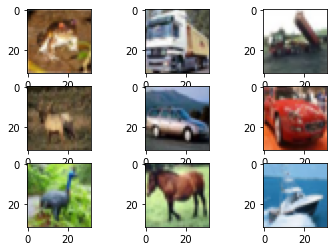

In [15]:

# example of loading the fashion mnist dataset

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [16]:
X_train.shape

(50000, 32, 32, 3)

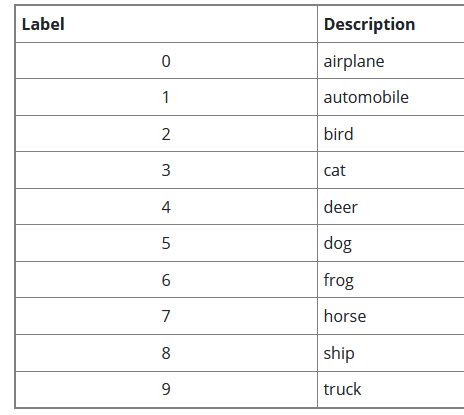

(50000, 32, 32, 3)
(10000, 32, 32, 3)


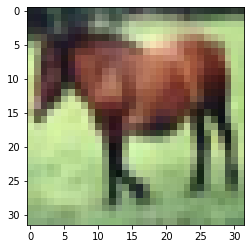

array([1], dtype=uint8)

In [26]:


# In[58]:


#get the image shape
print(X_train.shape)
print(X_test.shape)


# In[59]:


#print image shape
#X_train[0]


# In[60]:


#Print the image label
y_train[0]


# In[61]:


#plot the image via imshow
image_train = X_train[7]   
#image_train = np.array(image_train, dtype='float')   
pixelst = image_train#.reshape((32,32))  
plt.imshow(pixelst, cmap='gray')   
plt.show()
y_train[5] 

# In[62]:


In [27]:
image_train.shape

(32, 32, 3)

## Data prep

In [91]:


#reshape the data to fit the model
X_train = X_train.reshape(50000, 32,32,3)
X_test = X_test.reshape(10000, 32, 32, 3)


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


#one-Hot Encoding for fitting it for the model
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new label
print(y_train_one_hot[0])


# In[ ]:

y_test


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Set up model

In [70]:
model = Sequential()
#Convolutional layer
L1=model.add(Conv2D(64, kernel_size=3, activation='relu',kernel_initializer='he_uniform', padding='same',input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu',kernel_initializer='he_uniform', padding='same'))
#max pooling
L2=model.add(MaxPooling2D(pool_size=(2, 2)))
L3=model.add(Dropout(0.1))
#dense layer
L4=model.add(Flatten())

L5=model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

L5=model.add(Dense(10, activation='softmax'))
#Compile the model 
epochs=10
lrate = 0.01 
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) 

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                1048640   
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [71]:
hist = model.fit(X_train, y_train_one_hot, batch_size=32,validation_data=(X_test, y_test_one_hot), epochs=epochs)


Epoch 1/10
1563/1563 [==============================] - 104s 66ms/step - loss: 1.4528 - accuracy: 0.4733 - val_loss: 1.1863 - val_accuracy: 0.5662
Epoch 2/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.0171 - accuracy: 0.6388 - val_loss: 0.9933 - val_accuracy: 0.6503
Epoch 3/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.8651 - accuracy: 0.6986 - val_loss: 0.9298 - val_accuracy: 0.6771
Epoch 4/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.7767 - accuracy: 0.7309 - val_loss: 0.8951 - val_accuracy: 0.6861
Epoch 5/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.7141 - accuracy: 0.7524 - val_loss: 0.9101 - val_accuracy: 0.6847
Epoch 6/10
1563/1563 [==============================] - 162s 103ms/step - loss: 0.6597 - accuracy: 0.7703 - val_loss: 0.8932 - val_accuracy: 0.6908
Epoch 7/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.6176 - accuracy: 0.7863 - val_loss: 

In [73]:
model_name="CNN_cifar10_v5.h5"

model.save(model_name)

rec_model=keras.models.load_model(model_name)

# Final evaluation of the model 
#scores = model.evaluate(X_test, y_test, verbose=0) 
#print("Accuracy: %.2f%%" % (scores[1]*100))

In [75]:
y_train.shape
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Validate model

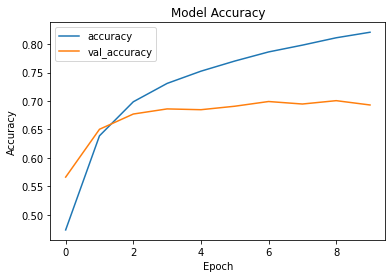

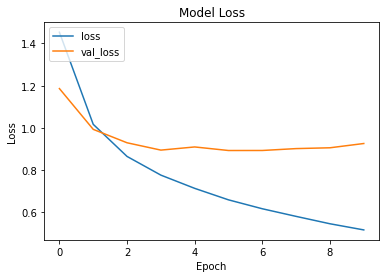

In [76]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
#plt.legend(['Accuracy'], loc='upper left')
plt.show()


# In[66]:


#Visualize the models loss
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='upper left')
plt.show()


# In[67]:


## Predicting the input image

Actual:     [[8 5 7 8 6 7 0 4 9 5]]
Prediction:  [8 5 5 8 6 7 0 2 9 4]


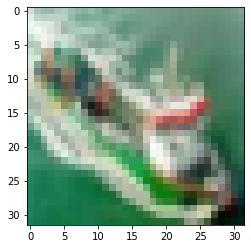

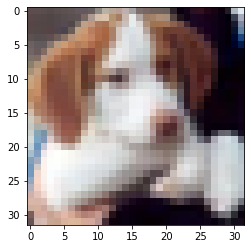

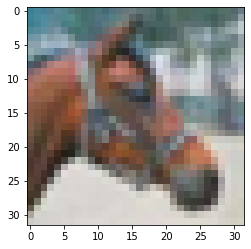

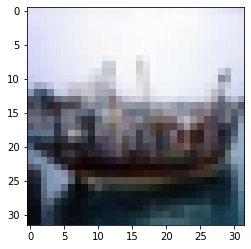

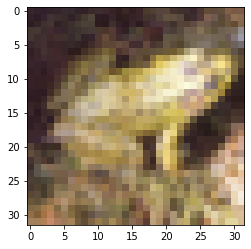

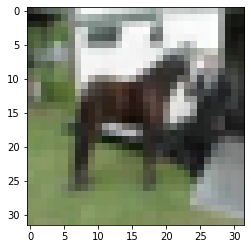

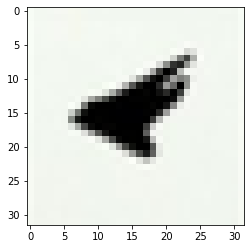

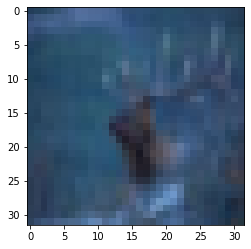

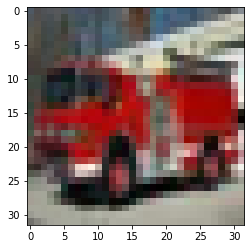

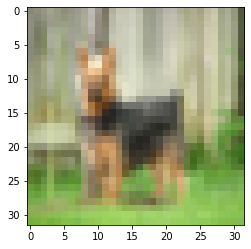

In [77]:


#predict the data
predictions = rec_model.predict(X_test[15:25])
predictions


# In[68]:



#Print the actual labels
print("Actual:    ",y_test[15:25].T)
#Print our predicitons as number labels for the first 4 images
print("Prediction: ", np.argmax(predictions, axis=1))


# In[69]:


#show the first 4 images as a pictures 
for i in range(15,25):   
    image = X_test[i]   
    #image = np.array(image, dtype='float')   
    pixels = image#.reshape((32,32))  
    plt.imshow(pixels, cmap='gray')   
    plt.show()